# Final Classification of Seen Gestures using KNN

In [1]:
import sys

sys.path.append('..')
sys.path

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from ie590_project_nonGIT.model.input_fn import input_fn_features
from ie590_project_nonGIT.utils.utils import Params, build_train_validate
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics

Flow of the code:

1. Load data_descriptors_mode.csv as training data for Knn
2. Make Gesture Label the class, and Descriptors the Training Features
3. Use Predicted Descriptors from predictions_mode.csv
4. Run and tune KNN to get the Max Accuracy

In [38]:
df_train = pd.read_csv('data_descriptors_mode.csv')
df_test = pd.read_csv('predictions_seen.csv')

In [3]:
descriptors = ['Both_Hands', 'F_Index', 'F_Middle', 'F_Pinky',
       'F_Ring', 'F_Thumb', 'M_Back', 'M_Down', 'M_Front', 'M_In',
       'M_Iterative', 'M_Out', 'M_Up', 'O_Back', 'O_Down', 'O_Front', 'O_In',
       'O_Out', 'O_Up']
x_train = df_train[descriptors].values
y_train = df_train['Label'].values

x_test = df_test[descriptors].values
y_test = df_test['Label'].values

In [23]:
neigh = knn(n_neighbors = 7, metric='jaccard')

In [24]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='jaccard',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [25]:
y_pred = neigh.predict(x_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5835657185350437


In [27]:
for i in np.arange(1,10):
    neigh = knn(n_neighbors = i, metric='jaccard')
    neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    print("Neighbors:",i)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    

Neighbors: 1
Accuracy: 0.5830079940509388
Neighbors: 2
Accuracy: 0.5945343000557725
Neighbors: 3
Accuracy: 0.5835657185350437
Neighbors: 4
Accuracy: 0.5828220858895705
Neighbors: 5
Accuracy: 0.5828220858895705
Neighbors: 6
Accuracy: 0.5828220858895705
Neighbors: 7
Accuracy: 0.5835657185350437
Neighbors: 8
Accuracy: 0.5835657185350437
Neighbors: 9
Accuracy: 0.5835657185350437


# Final Classification of Unseen Gestures using KNN

In [45]:
df_train_unseen = pd.read_csv('unseen_annotations.csv')
df_test_unseen = pd.read_csv('unseen_predictions.csv')

In [43]:
descriptors = ['Both_Hands', 'F_Index', 'F_Middle', 'F_Pinky',
       'F_Ring', 'F_Thumb', 'M_Back', 'M_Down', 'M_Front', 'M_In',
       'M_Iterative', 'M_Out', 'M_Up', 'O_Back', 'O_Down', 'O_Front', 'O_In',
       'O_Out', 'O_Up']
x_train_unseen = df_train_unseen[descriptors].values
y_train_unseen = df_train_unseen['label'].values

x_test_unseen = df_test_unseen[descriptors].values
y_test_unseen = df_test_unseen['label'].values

In [44]:
for i in np.arange(1,12):
    neigh = knn(n_neighbors = i, metric='jaccard')
    neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    print("Neighbors:",i)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    

Neighbors: 1
Accuracy: 0.31516936671575846
Neighbors: 2
Accuracy: 0.31516936671575846
Neighbors: 3
Accuracy: 0.31516936671575846
Neighbors: 4
Accuracy: 0.29086892488954347
Neighbors: 5
Accuracy: 0.2916053019145803
Neighbors: 6
Accuracy: 0.2930780559646539
Neighbors: 7
Accuracy: 0.2930780559646539
Neighbors: 8
Accuracy: 0.2930780559646539
Neighbors: 9
Accuracy: 0.2930780559646539
Neighbors: 10
Accuracy: 0.29455081001472755
Neighbors: 11
Accuracy: 0.29455081001472755


### Now checking one label at a time

In [31]:
#label = 3
def test_label(l):
    x_test_3 = df_test[df_test.label==l][descriptors].values
    y_test_3 = df_test[df_test.label==l]['label'].values
    neigh = knn(n_neighbors = 8, metric='jaccard')
    neigh.fit(x_train,y_train)
    y_pred_3 = neigh.predict(x_test_3)
    print("Label: ",l)
    print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))

In [32]:
ls = list(df_test_unseen.label.unique())
for l in ls:
    test_label(l)

Label:  3
Accuracy: 0.3485714285714286
Label:  6
Accuracy: 0.4269005847953216
Label:  17
Accuracy: 0.046511627906976744
Label:  22
Accuracy: 0.48214285714285715
Label:  25
Accuracy: 0.509090909090909
Label:  33
Accuracy: 0.10119047619047619
Label:  220
Accuracy: 0.29310344827586204
Label:  228
Accuracy: 0.1393939393939394


# Checking Descriptor Accuracies

In [74]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

seen_descriptor_accuracies = {}
seen_descriptor_f1 = {}

for d in descriptors:
    print("Descriptor: ",d)
    accuracy = accuracy_score(df_train[d], df_test[d])
    try:
        f1 = roc_auc_score(df_train[d], df_test[d])
    except: 
        f1 = 1
    print("Accuracy: ", round(accuracy,3))
    seen_descriptor_accuracies[d] = accuracy
    seen_descriptor_f1[d] = f1

Descriptor:  Both_Hands
Accuracy:  0.993
Descriptor:  F_Index
Accuracy:  0.855
Descriptor:  F_Middle
Accuracy:  0.906
Descriptor:  F_Pinky
Accuracy:  0.87
Descriptor:  F_Ring
Accuracy:  0.92
Descriptor:  F_Thumb
Accuracy:  0.889
Descriptor:  M_Back
Accuracy:  0.911
Descriptor:  M_Down
Accuracy:  0.982
Descriptor:  M_Front
Accuracy:  0.936
Descriptor:  M_In
Accuracy:  0.849
Descriptor:  M_Iterative
Accuracy:  0.936
Descriptor:  M_Out
Accuracy:  0.887
Descriptor:  M_Up
Accuracy:  1.0
Descriptor:  O_Back
Accuracy:  0.958
Descriptor:  O_Down
Accuracy:  0.955
Descriptor:  O_Front
Accuracy:  0.892
Descriptor:  O_In
Accuracy:  0.951
Descriptor:  O_Out
Accuracy:  1.0
Descriptor:  O_Up
Accuracy:  1.0


In [73]:
unseen_descriptor_accuracies = {}
unseen_descriptor_f1 = {}

for d in descriptors:
    print("Descriptor: ",d)
    accuracy = accuracy_score(df_train_unseen[d], df_test_unseen[d])
    try:
        f1 = roc_auc_score(df_train_unseen[d], df_test_unseen[d])
    except:
        f1 = 1
    print("Accuracy: ", round(accuracy,3))
    unseen_descriptor_accuracies[d] = accuracy
    unseen_descriptor_f1[d] = f1

Descriptor:  Both_Hands
Accuracy:  0.854
Descriptor:  F_Index
Accuracy:  0.594
Descriptor:  F_Middle
Accuracy:  0.655
Descriptor:  F_Pinky
Accuracy:  0.7
Descriptor:  F_Ring
Accuracy:  0.727
Descriptor:  F_Thumb
Accuracy:  0.357
Descriptor:  M_Back
Accuracy:  0.976
Descriptor:  M_Down
Accuracy:  0.826
Descriptor:  M_Front
Accuracy:  0.933
Descriptor:  M_In
Accuracy:  0.767
Descriptor:  M_Iterative
Accuracy:  0.853
Descriptor:  M_Out
Accuracy:  0.904
Descriptor:  M_Up
Accuracy:  1.0
Descriptor:  O_Back
Accuracy:  0.75
Descriptor:  O_Down
Accuracy:  0.708
Descriptor:  O_Front
Accuracy:  0.78
Descriptor:  O_In
Accuracy:  0.719
Descriptor:  O_Out
Accuracy:  0.82
Descriptor:  O_Up
Accuracy:  0.929


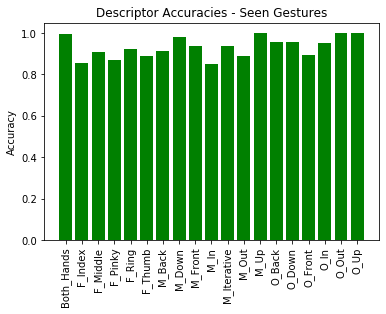

In [77]:
import matplotlib.pyplot as plt

plt.bar(list(seen_descriptor_accuracies.keys()), seen_descriptor_accuracies.values(), color='g')
plt.xticks(rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Descriptor Accuracies - Seen Gestures')
plt.show()


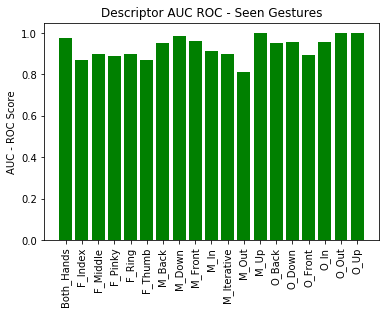

In [83]:
plt.bar(list(seen_descriptor_f1.keys()), seen_descriptor_f1.values(), color='g')
plt.xticks(rotation='vertical')
plt.ylabel('AUC - ROC Score')
plt.title('Descriptor AUC ROC - Seen Gestures')
plt.show()


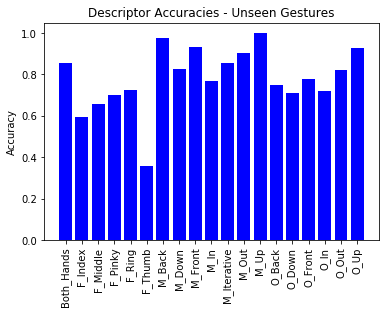

In [84]:
plt.bar(list(unseen_descriptor_accuracies.keys()), unseen_descriptor_accuracies.values(), color='b')
plt.xticks(rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Descriptor Accuracies - Unseen Gestures')
plt.show()


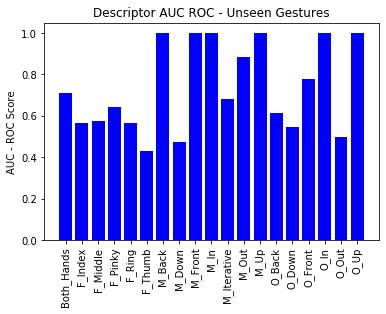

In [78]:
plt.bar(list(unseen_descriptor_f1.keys()), unseen_descriptor_f1.values(), color='b')
plt.xticks(rotation='vertical')
plt.ylabel('AUC - ROC Score')
plt.title('Descriptor AUC ROC - Unseen Gestures')
plt.show()


In [81]:
import numpy as np
np.average(list(seen_descriptor_accuracies.values()))

0.9311503801332669

In [82]:
np.average(list(unseen_descriptor_accuracies.values()))

0.7816835904193473